# Textmining

---

Group name: Group C

---


## Setup

In [1]:
# we suppress some unimportant warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
import altair as alt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from nltk.probability import FreqDist

## Data

In [3]:
#import csv from company article
df = pd.read_csv('/Users/Kim/Library/Mobile Documents/com~apple~CloudDocs/UNI/HdM/Semester7/Data Science Python/DS-Homework1/data/raw/webscraping02.csv')

In [4]:
df

,Unnamed: 0,Titel,URL,Thema,Autor,Datum,Artikeltext
0,0,Inside Twitter as ‘mass exodus’ of staff...,https://edition.cnn.com/2022/11/17/media/twitt...,New YorkCNN Business —,Oliver Darcy,"Updated 10:35 AM EST, Fri November 18...",New YorkCNN Business — Death i...


## Data correction

In [5]:
df['Artikeltext'] = df['Artikeltext'].astype(str).str.replace("YorkCNN","York CNN")

df['Artikeltext'] = df['Artikeltext'].astype(str).str.replace("A version of this article first appeared in the “Reliable Sources” newsletter. Sign up for the daily digest chronicling the evolving media landscape here.","")

df

,Unnamed: 0,Titel,URL,Thema,Autor,Datum,Artikeltext
0,0,Inside Twitter as ‘mass exodus’ of staff...,https://edition.cnn.com/2022/11/17/media/twitt...,New YorkCNN Business —,Oliver Darcy,"Updated 10:35 AM EST, Fri November 18...",New York CNN Business — Death ...


In [6]:
df['Artikeltext_lower'] = df['Artikeltext'].astype(str).str.lower()

df

,Unnamed: 0,Titel,URL,Thema,Autor,Datum,Artikeltext,Artikeltext_lower
0,0,Inside Twitter as ‘mass exodus’ of staff...,https://edition.cnn.com/2022/11/17/media/twitt...,New YorkCNN Business —,Oliver Darcy,"Updated 10:35 AM EST, Fri November 18...",New York CNN Business — Death ...,new york cnn business — death ...


## Text mining data preparation

### Tokenization

In [7]:
# YOUR CODE HERE
regexp = RegexpTokenizer('\w+') # use regular expression to match (multiple) word characters and numbers

df['Artikeltext_token']=df['Artikeltext_lower'].apply(regexp.tokenize) # insert the data column and the regular expression pattern

df

,Unnamed: 0,Titel,URL,Thema,Autor,Datum,Artikeltext,Artikeltext_lower,Artikeltext_token
0,0,Inside Twitter as ‘mass exodus’ of staff...,https://edition.cnn.com/2022/11/17/media/twitt...,New YorkCNN Business —,Oliver Darcy,"Updated 10:35 AM EST, Fri November 18...",New York CNN Business — Death ...,new york cnn business — death ...,"[new, york, cnn, business, death, is, in, the,..."


### Stopwords

In [8]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [9]:
# make your own custom stopwords
my_stopwords = ['https', 'co']

In [10]:
# Extend the stopword list with your own custom stopwords
stopwords.extend(my_stopwords)

In [11]:
df['Artikeltext_token_s'] = df['Artikeltext_token'].apply(lambda x: [i for i in x if i not in stopwords])

df

,Unnamed: 0,Titel,URL,Thema,Autor,Datum,Artikeltext,Artikeltext_lower,Artikeltext_token,Artikeltext_token_s
0,0,Inside Twitter as ‘mass exodus’ of staff...,https://edition.cnn.com/2022/11/17/media/twitt...,New YorkCNN Business —,Oliver Darcy,"Updated 10:35 AM EST, Fri November 18...",New York CNN Business — Death ...,new york cnn business — death ...,"[new, york, cnn, business, death, is, in, the,...","[new, york, cnn, business, death, air, twitter..."


### Transform data and remove infrequent words

In [12]:
df['Artikeltext_si'] = df['Artikeltext_token_s'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))

df

,Unnamed: 0,Titel,URL,Thema,Autor,Datum,Artikeltext,Artikeltext_lower,Artikeltext_token,Artikeltext_token_s,Artikeltext_si
0,0,Inside Twitter as ‘mass exodus’ of staff...,https://edition.cnn.com/2022/11/17/media/twitt...,New YorkCNN Business —,Oliver Darcy,"Updated 10:35 AM EST, Fri November 18...",New York CNN Business — Death ...,new york cnn business — death ...,"[new, york, cnn, business, death, is, in, the,...","[new, york, cnn, business, death, air, twitter...",new york cnn business death air twitter platfo...


### Lemmatization

In [13]:
wordnet_lem = WordNetLemmatizer()

In [14]:
# create a new column called text_sil (l for lemmatization) and apply the function .lemmatize
df['Artikeltext_sil'] = df['Artikeltext_si'].apply(wordnet_lem.lemmatize)

# we check wether there are any differences in the two columns
check_difference = (df['Artikeltext_sil'] == df['Artikeltext_sil'])

# sum all True and False values
check_difference.value_counts()

True    1
Name: Artikeltext_sil, dtype: int64

In [15]:
df

,Unnamed: 0,Titel,URL,Thema,Autor,Datum,Artikeltext,Artikeltext_lower,Artikeltext_token,Artikeltext_token_s,Artikeltext_si,Artikeltext_sil
0,0,Inside Twitter as ‘mass exodus’ of staff...,https://edition.cnn.com/2022/11/17/media/twitt...,New YorkCNN Business —,Oliver Darcy,"Updated 10:35 AM EST, Fri November 18...",New York CNN Business — Death ...,new york cnn business — death ...,"[new, york, cnn, business, death, is, in, the,...","[new, york, cnn, business, death, air, twitter...",new york cnn business death air twitter platfo...,new york cnn business death air twitter platfo...


## Data visualization
### Word cloud

In [16]:
# combine all words in one object called all_words
all_words = ' '.join([i for i in df["Artikeltext_sil"]])

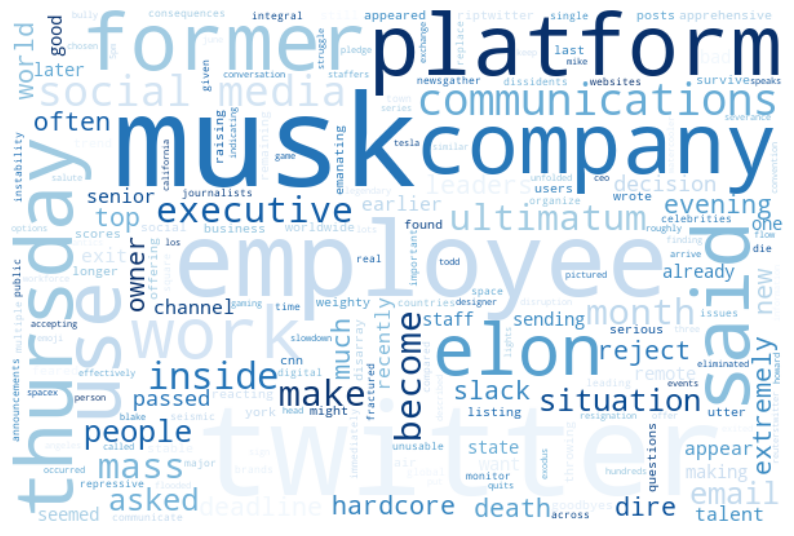

In [17]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100,
                     background_color="white",
                     colormap="Blues").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

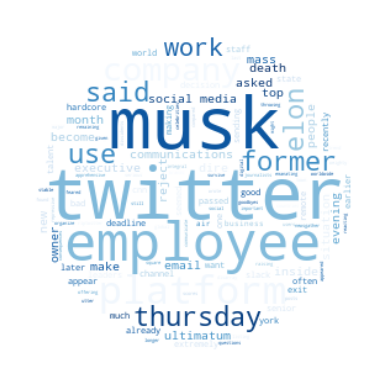

In [18]:
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask, colormap="Blues")
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

### Frequency distributions

In [19]:
# tokenize the words
words_tokens = nltk.word_tokenize(all_words)

# use the function FreqDist and save the result as fd
fd = FreqDist(words_tokens)

In [20]:
fd

FreqDist({'twitter': 13, 'musk': 13, 'employees': 6, 'company': 6, 'platform': 5, 'thursday': 5, 'social': 5, 'former': 5, 'said': 5, 'media': 4, ...})

### most common words

In [21]:
# show the 5 most common words as table
fd.tabulate(5)

  twitter      musk employees   company  platform 
       13        13         6         6         5 


### Plot common words

In [22]:
# Obtain top 10 words
top_10 = fd.most_common(10)

top_10

[('twitter', 13),
 ('musk', 13),
 ('employees', 6),
 ('company', 6),
 ('platform', 5),
 ('thursday', 5),
 ('social', 5),
 ('former', 5),
 ('said', 5),
 ('media', 4)]

In [23]:
# make a pandas datframe from the dictionary
df_dist = pd.DataFrame({"value": dict(top_10)})

df_dist

,value
company,6
employees,6
former,5
media,4
musk,13
platform,5
said,5
social,5
thursday,5
twitter,13


In [24]:
# reset index to transform index to column
df_dist.reset_index(inplace=True)

df_dist

,index,value
0,company,6
1,employees,6
2,former,5
3,media,4
4,musk,13
5,platform,5
6,said,5
7,social,5
8,thursday,5
9,twitter,13


In [25]:
alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("value",
            axis=alt.Axis(title="Häufigkeit", titleAnchor="start", grid=False)),
    y=alt.Y("index", sort="-x", axis=alt.Axis(title="Worte", grid=False))
).properties(
    title="Zehn häufigste Wörter"
).configure_title(
    anchor="start"
)

alt.Chart(...)

In [26]:
# Show frequency of the word "tweet"
fd["tweet"]

1

## Sentiment
### Sentiment Intensity Analyzer

In [27]:
analyzer = SentimentIntensityAnalyzer()

### Polarity scores

In [28]:
df['polarity'] = df['Artikeltext_sil'].apply(lambda x: analyzer.polarity_scores(x))

In [29]:
df

,Unnamed: 0,Titel,URL,Thema,Autor,Datum,Artikeltext,Artikeltext_lower,Artikeltext_token,Artikeltext_token_s,Artikeltext_si,Artikeltext_sil,polarity
0,0,Inside Twitter as ‘mass exodus’ of staff...,https://edition.cnn.com/2022/11/17/media/twitt...,New YorkCNN Business —,Oliver Darcy,"Updated 10:35 AM EST, Fri November 18...",New York CNN Business — Death ...,new york cnn business — death ...,"[new, york, cnn, business, death, is, in, the,...","[new, york, cnn, business, death, air, twitter...",new york cnn business death air twitter platfo...,new york cnn business death air twitter platfo...,"{'neg': 0.128, 'neu': 0.754, 'pos': 0.118, 'co..."


### Transform data

In [30]:
# Change data structure (we unnest the column polarity and add new columns)
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)

In [31]:
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else 'neutral' if x == 0 else 'negative')

### Max and min sentiment | not relevant because there is only one article 

In [32]:
# Tweet with highest positive sentiment
df[['Artikeltext', 'compound', 'neg', 'neu', 'pos', 'sentiment']].loc[df['compound'].idxmax()]

Artikeltext    New York CNN Business        —          Death ...
compound                                                 -0.8847
neg                                                        0.128
neu                                                        0.754
pos                                                        0.118
sentiment                                               negative
Name: 0, dtype: object

In [33]:
# Tweet with highest negative sentiment 
# ...seems to be a case of wrong classification because of the word "deficit"
df[['Artikeltext', 'compound', 'neg', 'neu', 'pos', 'sentiment']].loc[df['compound'].idxmin()]

Artikeltext    New York CNN Business        —          Death ...
compound                                                 -0.8847
neg                                                        0.128
neu                                                        0.754
pos                                                        0.118
sentiment                                               negative
Name: 0, dtype: object

### Visualize Data

In [34]:
# create data to change colors in Altair plot
domain = ['neutral', 'positive', 'negative']
range_=['#b2d8d8',"#008080", '#db3d13']


alt.Chart(df).mark_bar().encode(
    x=alt.X('count()', title=None),
    y=alt.Y('sentiment', sort="-x"),
    color= alt.Color('sentiment', legend=None, scale=alt.Scale(domain=domain, range=range_))
).properties(
    title="Sentiment analysis",
    width=400,
    height=150,
)

alt.Chart(...)

In [35]:
df

,Unnamed: 0,Titel,URL,Thema,Autor,Datum,Artikeltext,Artikeltext_lower,Artikeltext_token,Artikeltext_token_s,Artikeltext_si,Artikeltext_sil,neg,neu,pos,compound,sentiment
0,0,Inside Twitter as ‘mass exodus’ of staff...,https://edition.cnn.com/2022/11/17/media/twitt...,New YorkCNN Business —,Oliver Darcy,"Updated 10:35 AM EST, Fri November 18...",New York CNN Business — Death ...,new york cnn business — death ...,"[new, york, cnn, business, death, is, in, the,...","[new, york, cnn, business, death, air, twitter...",new york cnn business death air twitter platfo...,new york cnn business death air twitter platfo...,0.128,0.754,0.118,-0.8847,negative


In [36]:
df.to_csv("/Users/Kim/Library/Mobile Documents/com~apple~CloudDocs/UNI/HdM/Semester7/Data Science Python/DS-Homework1/data/processed/textmining-clean-cnn.csv", index=None)